### Task - 3: Clustering (Complete)

#### Used Packages:

In [1]:
import pandas as pd
from scipy.io.arff import loadarff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.mixture import GaussianMixture

from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
address = ""

> Loading four arff files into four different Pandas dataFrames:

In [3]:
df = []
data = loadarff(address + 'dataset1_noClusters7.arff') #7
df.append(pd.DataFrame(data[0]))
data = loadarff(address + 'dataset2_noClusters3.arff') #3
df.append(pd.DataFrame(data[0]))
data = loadarff(address + 'dataset3_noClusters3.arff') #3
df.append(pd.DataFrame(data[0]))
df[2].rename(columns = {'CLASS':'class'}, inplace = True)
data = loadarff(address + 'dataset4_noClusters2.arff') #2
df.append(pd.DataFrame(data[0]))

#### Preprocessing:

> Checking for empty data points:

In [4]:
for i in range(4):
    print(df[i].isna().sum())

x        0
y        0
class    0
dtype: int64
x        0
y        0
class    0
dtype: int64
x        0
y        0
class    0
dtype: int64
x        0
y        0
class    0
dtype: int64


> Changing data in column 'class' from strings to integer values:

In [5]:
for i in range(4):
    df[i] = df[i].sort_values(by=['class'])
    df[i]['class'] = pd.Categorical(df[i]['class'])
    df[i]['class'] = df[i]['class'].cat.codes + 1

> Function for normalizing the data for more accurate results:

In [6]:
def dataNormalize(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0) 
    data_std[data_std == 0] = 1
    data_norm = (data - data_mean)/data_std
    return data_norm

> Normalizing the data:

In [7]:
for i in range(4):
    df[i].iloc[:,:2] = dataNormalize(df[i].iloc[:,:2])

> Plot for all dataFrames with predefined clusters:

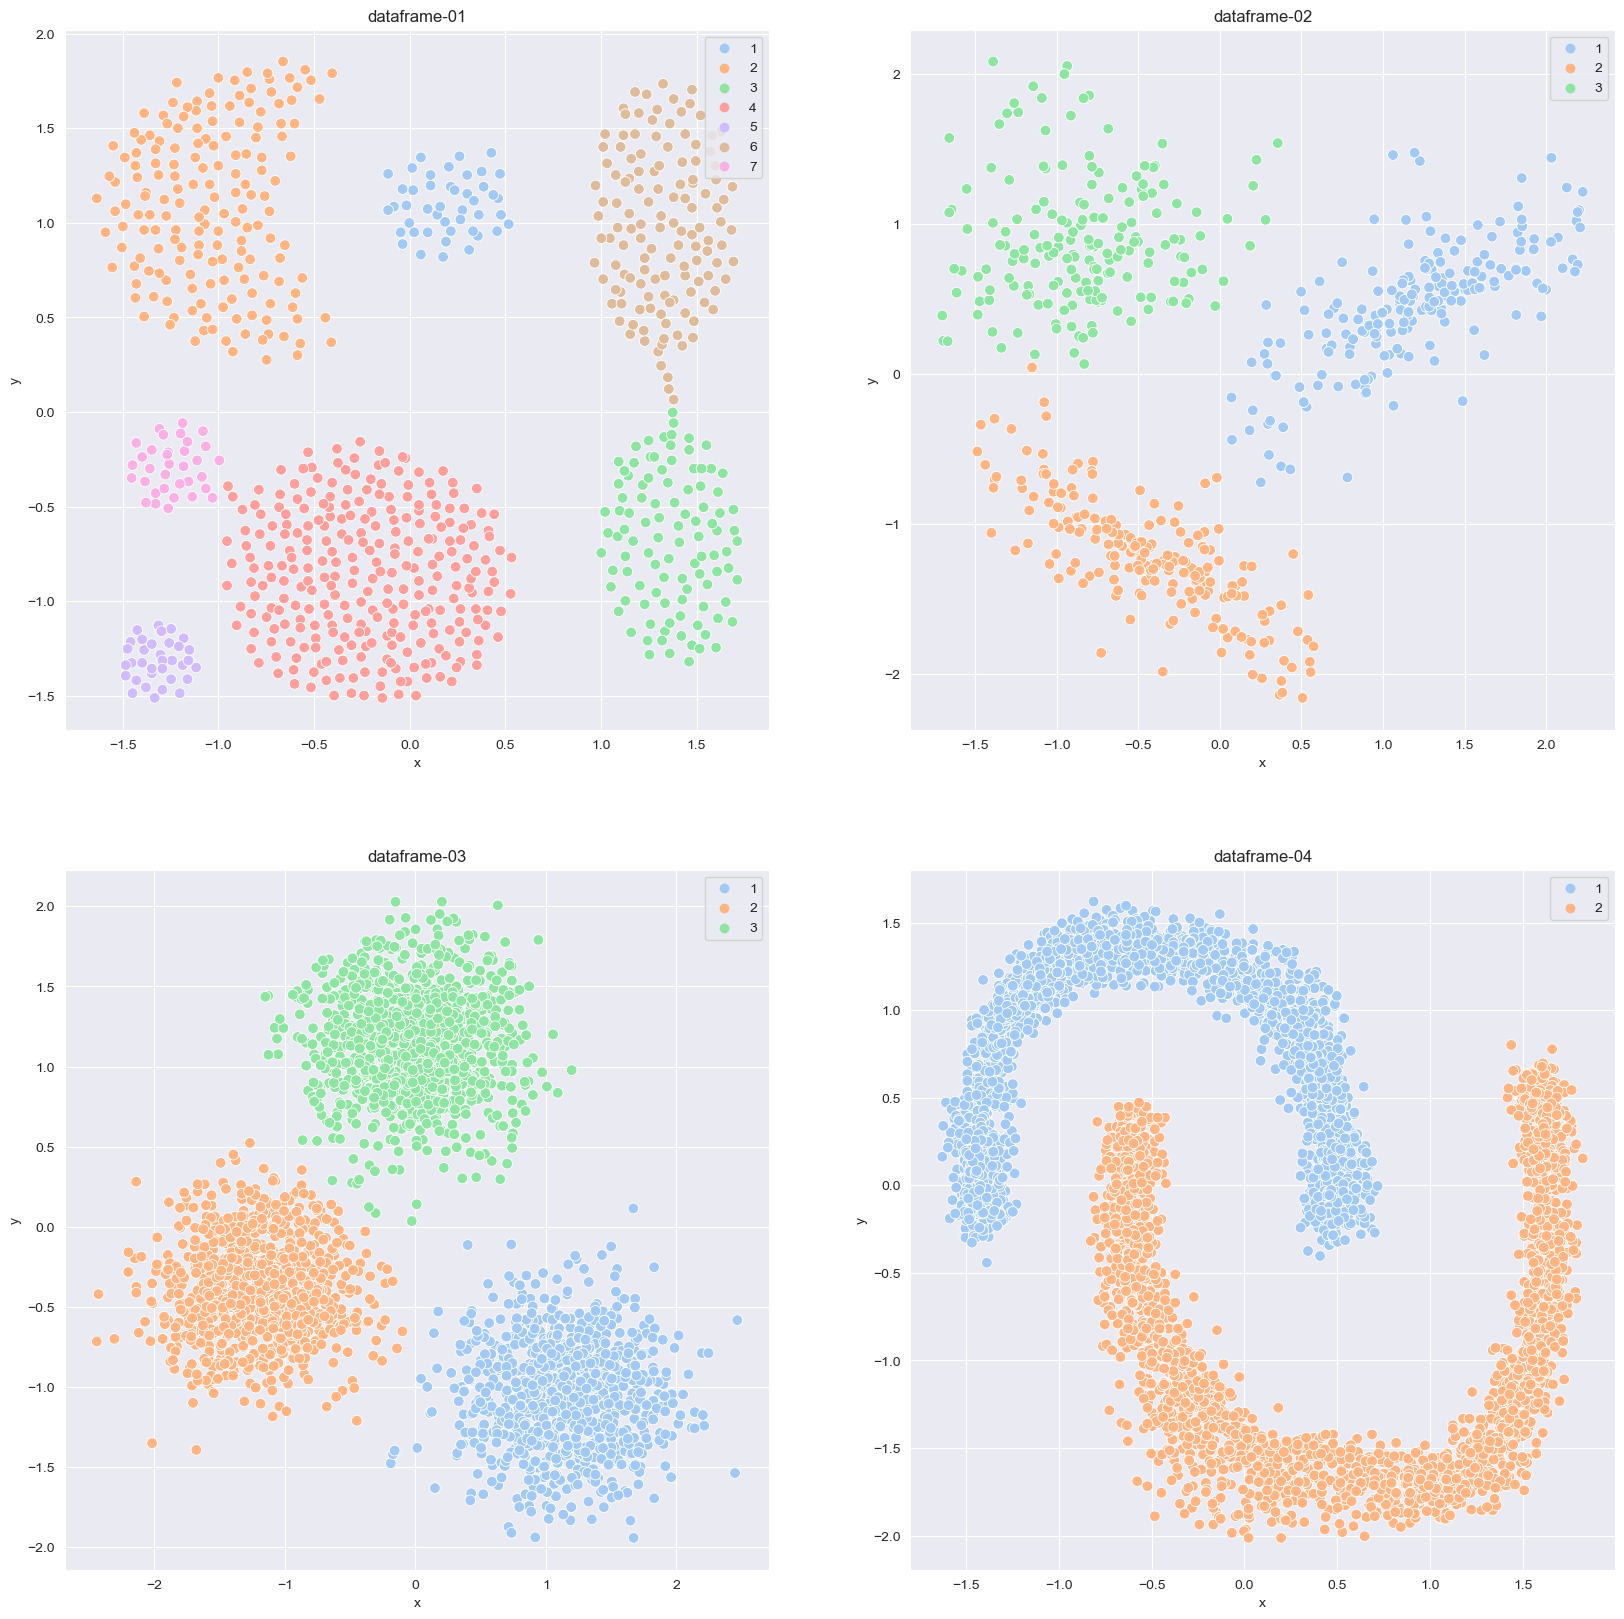

In [8]:
n = 20
fig = plt.figure(figsize=(n,n))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
#     sb.set(rc={"figure.figsize":(14, 14)})
    plt.title("dataframe-0"+str(i+1))
    sb.scatterplot(data = df[i], x='x',y='y',hue='class',s=60,palette="pastel", ax=ax)
    plt.legend(loc='upper right')

> introducing some variables for easier representation of multiple DataFrames:

In [9]:
clusters_num = [7,3,3,2]

X_arr = []
Y_arr = []

for i in range(4):
    X_arr.append(df[i].iloc[:,:2])
    Y_arr.append(df[i].iloc[:,-1:])

> The following function implements DBSCAN algorithm on a DataFrame and plots the result.  
> Also, checks the result with predefined labels and provides evaluations using Normalized Mutual Info and Random Score.

> Arguments:
> > X: Data given to us.  
> > Y: Predefined cluster labels.  
> > eps, min_samples  
> > df_num: DataFrame name for plot.  
> > clusters_num: number of clusters.
>
> Returns a dictionary containing two evaluations.

In [10]:
def abstract_dbscan(X,Y,eps,min_samples,df_num,clusters_num):
    print("\t\t\t***dataframe-0"+str(df_num)+"***\n")

    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    Y_pred = clustering.labels_

    dbscan = {
        'nmi': normalized_mutual_info_score(Y.to_numpy().T[0],Y_pred),
        'rs': adjusted_rand_score(Y.to_numpy().T[0],Y_pred)
    }
    # print('DBSCAN Evaluations: ')
    # print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
    # print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
    
    n = 5
    sb.set(rc={"figure.figsize":(5, 5)})
    plt.title("dataframe-0"+str(df_num)+" - DBSCAN")
    sb.scatterplot(data = X,x='x',y='y',hue=Y_pred,s=60,palette="pastel")
    plt.legend(loc='upper right')

    return dbscan

> The following function implements four different algorithms: Kmeans++, Kmeans, Average Link, Expectation Maximization. Function also provides a plot for each algorithm along with evaluations using Normalized Mutual Info and Random Score.

> Arguments:
> > X: Data given to us.  
> > Y: Predefined cluster labels.  
> > df_num: DataFrame name for plot.  
> > clusters_num: number of clusters.
>
> Returns four dictionaries containing two evaluations for each algorithm.

In [11]:
def quadrupleclustering(X,Y,df_num,cluster_num):
    
    print("\t\t\t***dataframe-0"+str(df_num)+"***\n")
    
    n=20
    fig = plt.figure(figsize=(n,n))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    # fig.set_size_inches(18.5, 18.5)

    kmeansplus = KMeans(n_clusters=cluster_num,init='k-means++')
    kmeansplus.fit(X)

    kmp = {
        'nmi': normalized_mutual_info_score(Y.to_numpy().T[0],kmeansplus.labels_),
        'rs': adjusted_rand_score(Y.to_numpy().T[0],kmeansplus.labels_)
        }

    ax = fig.add_subplot(2, 2, 1)
    sb.set(rc={"figure.figsize":(14, 14)})
    plt.title("dataframe-0"+str(df_num)+" - KMeans++")
    sb.scatterplot(data = X,x='x',y='y',hue=kmeansplus.labels_,s=60,palette="pastel",ax=ax)
    plt.legend(loc='upper right')
  
    ##############
    
    kmeans = KMeans(n_clusters=cluster_num)
    kmeans.fit(X)

    km = {
        'nmi': normalized_mutual_info_score(Y.to_numpy().T[0],kmeans.labels_),
        'rs': adjusted_rand_score(Y.to_numpy().T[0],kmeans.labels_)
        }
    
    ax = fig.add_subplot(2, 2, 2)
    sb.set(rc={"figure.figsize":(14, 14)})
    plt.title("dataframe-0"+str(df_num)+" - Standard KMeans")
    sb.scatterplot(data = X,x='x',y='y',hue=kmeans.labels_,s=60,palette="pastel", ax=ax)
    plt.legend(loc='upper right')
   
    ##############

    avglink = AC(n_clusters=cluster_num)
    avglink.fit(X)

    al = {
        'nmi': normalized_mutual_info_score(Y.to_numpy().T[0],avglink.labels_),
        'rs': adjusted_rand_score(Y.to_numpy().T[0],avglink.labels_)
        }

    ax = fig.add_subplot(2, 2, 3)
    sb.set(rc={"figure.figsize":(14, 14)})
    plt.title("dataframe-0"+str(df_num)+" - Average Link")
    sb.scatterplot(data = X,x='x',y='y',hue=avglink.labels_,s=60,palette="pastel", ax=ax)
    plt.legend(loc='upper right')

    ##############

    gm = GaussianMixture(n_components=cluster_num, random_state=0)
    gm.fit(X)

    em = {
        'nmi': normalized_mutual_info_score(Y.to_numpy().T[0], gm.fit_predict(X)),
        'rs': adjusted_rand_score(Y.to_numpy().T[0], gm.fit_predict(X))
        }

    ax = fig.add_subplot(2, 2, 4)
    sb.set(rc={"figure.figsize":(14, 14)})
    plt.title("dataframe-0"+str(df_num)+" - GaussianMixture")
    sb.scatterplot(data = X,x='x',y='y',hue=gm.fit_predict(X),s=60,palette="pastel", ax=ax)
    plt.legend(loc='upper right')

    return kmp, km, al, em

> A function for printing evaluations for each algorithm implemented:

In [12]:
def printEval(evaldicts,df_num):
    
    dbscan = evaldicts['dbscan']
    kmp = evaldicts['kmp']
    km = evaldicts['km']
    al = evaldicts['al']
    em = evaldicts['em']
    
    print("\t\t\t***dataframe-0"+str(df_num+1)+"***\n")

    print('DBSCAN Evaluations: ')
    print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
    print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
    print('\n')

    print("KMeans++ Evaluation:")
    print('\tnormalized_mutual_info_score ->\t', kmp['nmi'])
    print('\t\t adjusted_rand_score ->\t', kmp['rs'])
    print('\n')

    print("Standard KMeans Evaluation:")
    print('\tnormalized_mutual_info_score:\t', km['nmi'])
    print('\t\t adjusted_rand_score:\t', km['rs'])
    print('\n')

    print("Average Link Evaluation:")
    print('\tnormalized_mutual_info_score:\t', al['nmi'])
    print('\t\t adjusted_rand_score:\t', al['rs'])
    print('\n')

    print("GaussianMixture Evaluation:")
    print('\tnormalized_mutual_info_score:\t', em['nmi'])
    print('\t\t adjusted_rand_score:\t', em['rs'])
    print('\n')

> Introduced a variable for easier presentation of multiple DataFrames:

In [13]:
evaldicts = [{},{},{},{}]

#### Following blocks of code are the implementations on the first DataFrame:

			***dataframe-01***

DBSCAN Evaluations for eps=0.22, min_samples=18: 
	normalized_mutual_info_score ->	 0.9555087639668326
		 adjusted_rand_score ->	 0.9610148236203425




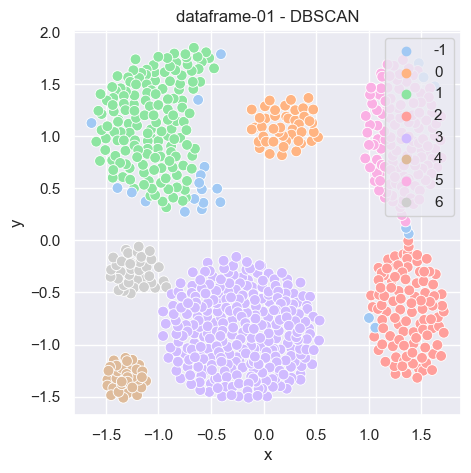

In [14]:
i=0

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.22, min_samples=18, df_num=i+1, clusters_num=clusters_num[i])

evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.22, min_samples=18: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-01***

DBSCAN Evaluations for eps=0.4, min_samples=14: 
	normalized_mutual_info_score ->	 0.8358524361747061
		 adjusted_rand_score ->	 0.7338255908338442




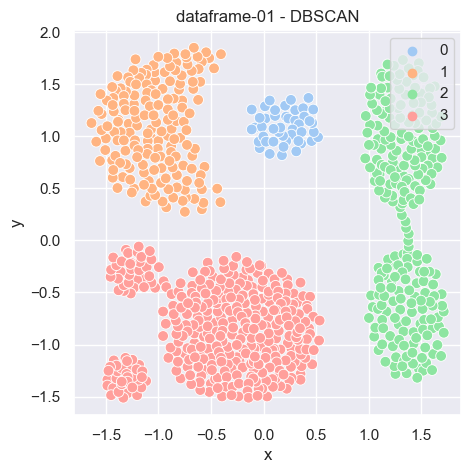

In [15]:
i=0

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.4, min_samples=14, df_num=i+1, clusters_num=clusters_num[i])

evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.4, min_samples=14: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

In [16]:
i=0

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.2, min_samples=10, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.2, min_samples=10: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-01***

DBSCAN Evaluations for eps=0.2, min_samples=10: 
	normalized_mutual_info_score ->	 0.9474586019072934
		 adjusted_rand_score ->	 0.9097222076744425




> The following is the best result for DBSCAN on the first dataset

			***dataframe-01***



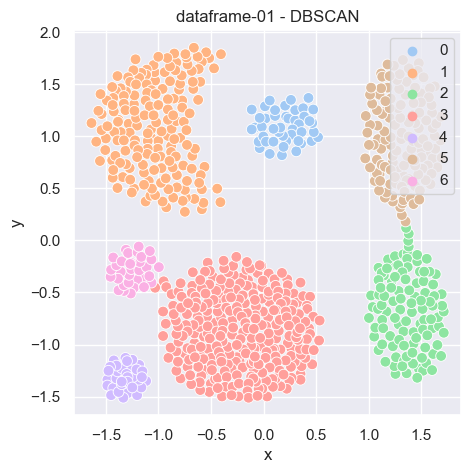

In [17]:
i=0

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.22, min_samples=14, df_num=i+1, clusters_num=clusters_num[i])

evaldicts[i]['dbscan'] = dbscan

In [18]:
i=0

kmp,km,al,em = quadrupleclustering(X_arr[i],Y_arr[i],i+1,clusters_num[i])

evaldicts[i]['kmp'] = kmp
evaldicts[i]['km'] = km
evaldicts[i]['al'] = al
evaldicts[i]['em'] = em

			***dataframe-01***



In [19]:
i=0

printEval(evaldicts[i],i)

			***dataframe-01***

DBSCAN Evaluations: 
	normalized_mutual_info_score ->	 0.9882593666318665
		 adjusted_rand_score ->	 0.9927264153997101


KMeans++ Evaluation:
	normalized_mutual_info_score ->	 0.8298548043176034
		 adjusted_rand_score ->	 0.7150821868859835


Standard KMeans Evaluation:
	normalized_mutual_info_score:	 0.8356263690239233
		 adjusted_rand_score:	 0.727342497396113


Average Link Evaluation:
	normalized_mutual_info_score:	 0.9003890226911718
		 adjusted_rand_score:	 0.8018873039381645


GaussianMixture Evaluation:
	normalized_mutual_info_score:	 0.8837364977485775
		 adjusted_rand_score:	 0.8028636826317977




> Clusters in this dataset are fairly apart from each other.  

> Clusters are scattered in spherical areas.  

#### Following blocks of code are the implementations on the second DataFrame:

In [20]:
i=1

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.2, min_samples=10, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.2, min_samples=10: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-02***

DBSCAN Evaluations for eps=0.2, min_samples=10: 
	normalized_mutual_info_score ->	 0.7021469649561726
		 adjusted_rand_score ->	 0.666780841706712




			***dataframe-02***

DBSCAN Evaluations for eps=0.2, min_samples=18: 
	normalized_mutual_info_score ->	 0.5275427910320666
		 adjusted_rand_score ->	 0.3554287631170394




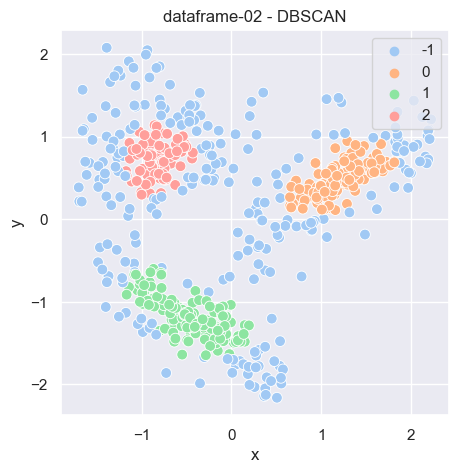

In [21]:
i=1

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.2, min_samples=18, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.2, min_samples=18: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

In [22]:
i=1

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.3, min_samples=10, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.3, min_samples=10: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-02***

DBSCAN Evaluations for eps=0.3, min_samples=10: 
	normalized_mutual_info_score ->	 0.9203804236854536
		 adjusted_rand_score ->	 0.9506903568235324




			***dataframe-02***



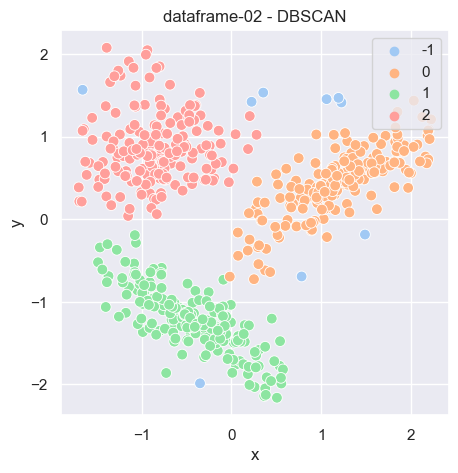

In [23]:
i = 1

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.3, min_samples=5, df_num=i+1, clusters_num=clusters_num[i])

evaldicts[i]['dbscan'] = dbscan

			***dataframe-02***



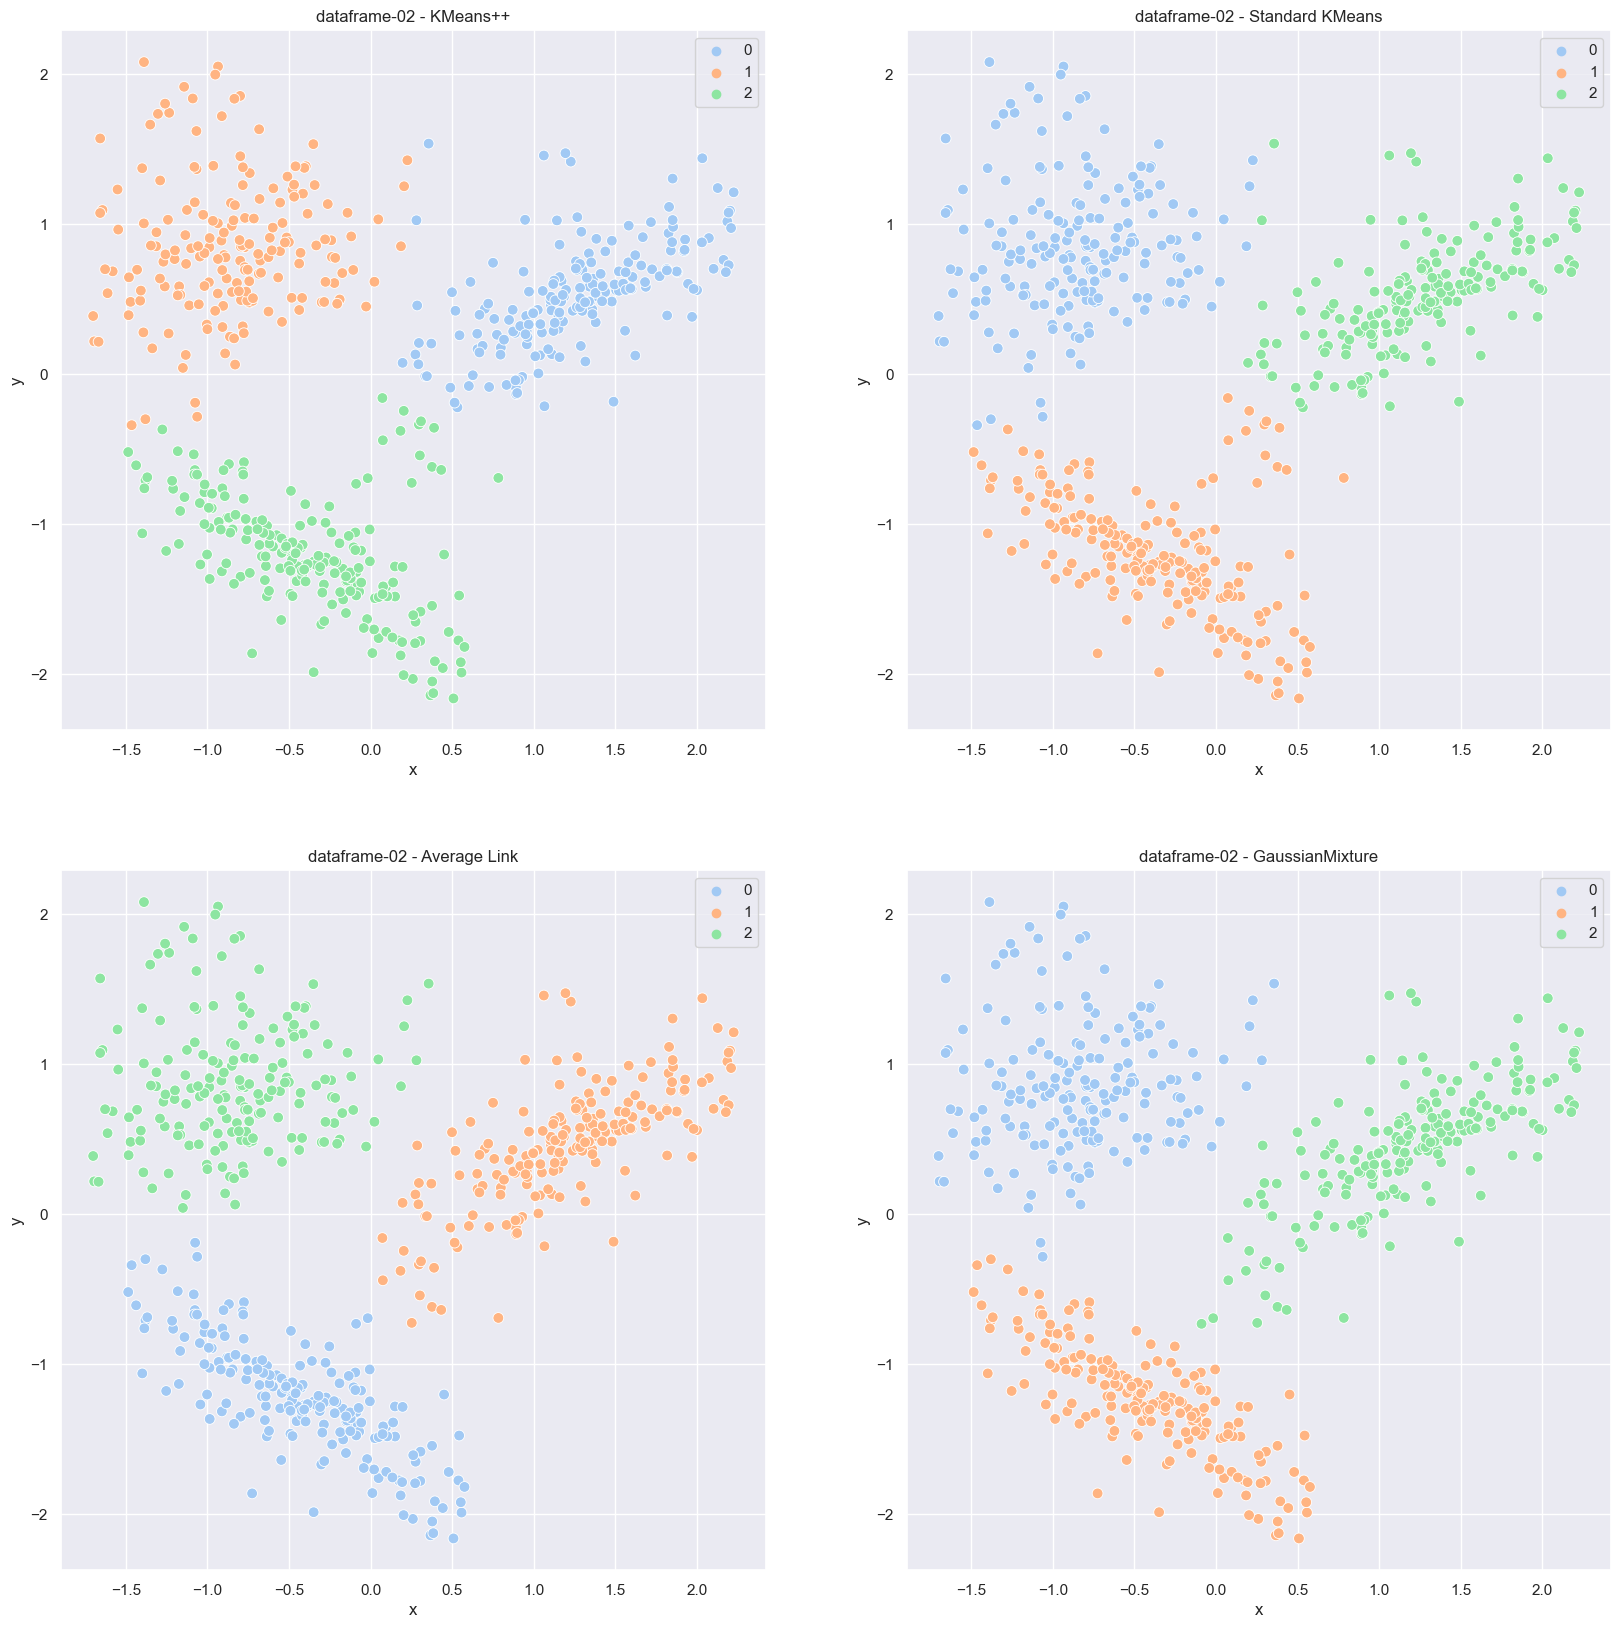

In [24]:
i = 1

kmp,km,al,em = quadrupleclustering(X_arr[i],Y_arr[i],i+1,clusters_num[i])

evaldicts[i]['kmp'] = kmp
evaldicts[i]['km'] = km
evaldicts[i]['al'] = al
evaldicts[i]['em'] = em

In [25]:
i = 1

printEval(evaldicts[i],i)

			***dataframe-02***

DBSCAN Evaluations: 
	normalized_mutual_info_score ->	 0.9399197699576075
		 adjusted_rand_score ->	 0.966221784265581


KMeans++ Evaluation:
	normalized_mutual_info_score ->	 0.8741103315070666
		 adjusted_rand_score ->	 0.9031017133441159


Standard KMeans Evaluation:
	normalized_mutual_info_score:	 0.8741103315070665
		 adjusted_rand_score:	 0.9031017133441159


Average Link Evaluation:
	normalized_mutual_info_score:	 0.990134109045762
		 adjusted_rand_score:	 0.9948510359728461


GaussianMixture Evaluation:
	normalized_mutual_info_score:	 0.9579579606026477
		 adjusted_rand_score:	 0.9740072796039211




> In this dataset clusters are not coherence.  

> The data is noisy

#### Following blocks of code are the implementations on the third DataFrame:

			***dataframe-03***

DBSCAN Evaluations for eps=0.2, min_samples=10: 
	normalized_mutual_info_score ->	 0.9587823675450626
		 adjusted_rand_score ->	 0.9782073333162218




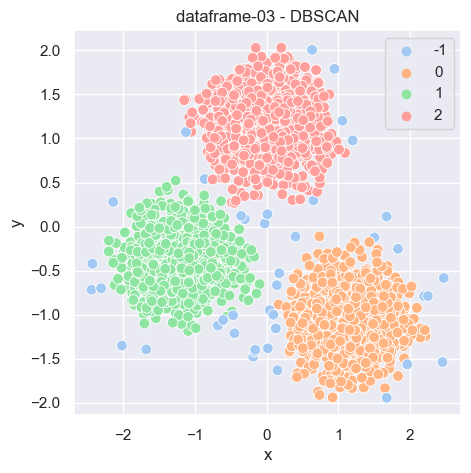

In [26]:
i=2

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.2, min_samples=10, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.2, min_samples=10: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-03***

DBSCAN Evaluations for eps=0.3, min_samples=10: 
	normalized_mutual_info_score ->	 0.0023954406142444157
		 adjusted_rand_score ->	 0.0003720244180271906




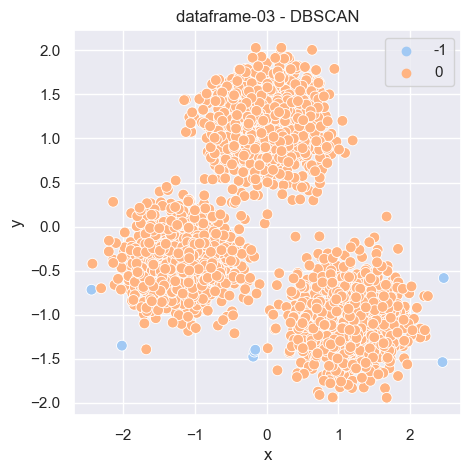

In [27]:
i=2

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.3, min_samples=10, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.3, min_samples=10: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-03***

DBSCAN Evaluations for eps=0.2, min_samples=17: 
	normalized_mutual_info_score ->	 0.9282132861758996
		 adjusted_rand_score ->	 0.9556083995084738




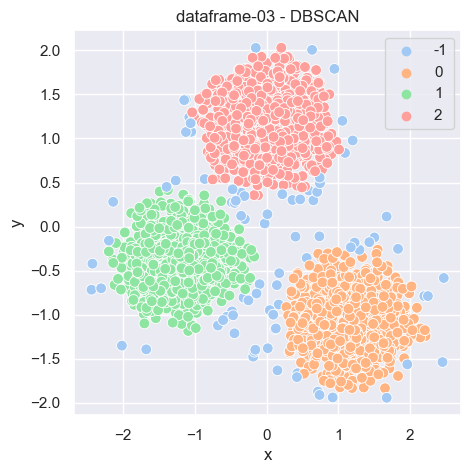

In [28]:
i=2

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.2, min_samples=17, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.2, min_samples=17: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-03***



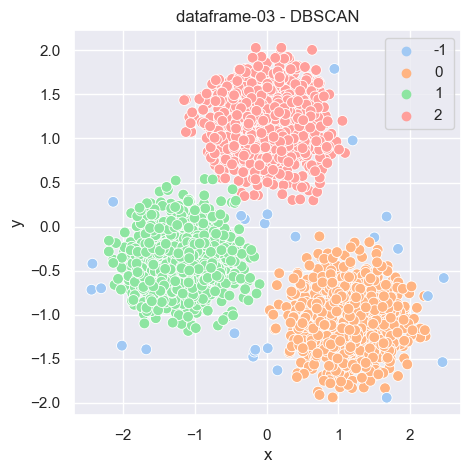

In [29]:
i=2

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.235, min_samples=14, df_num=i+1, clusters_num=clusters_num[i])

evaldicts[i]['dbscan'] = dbscan

			***dataframe-03***



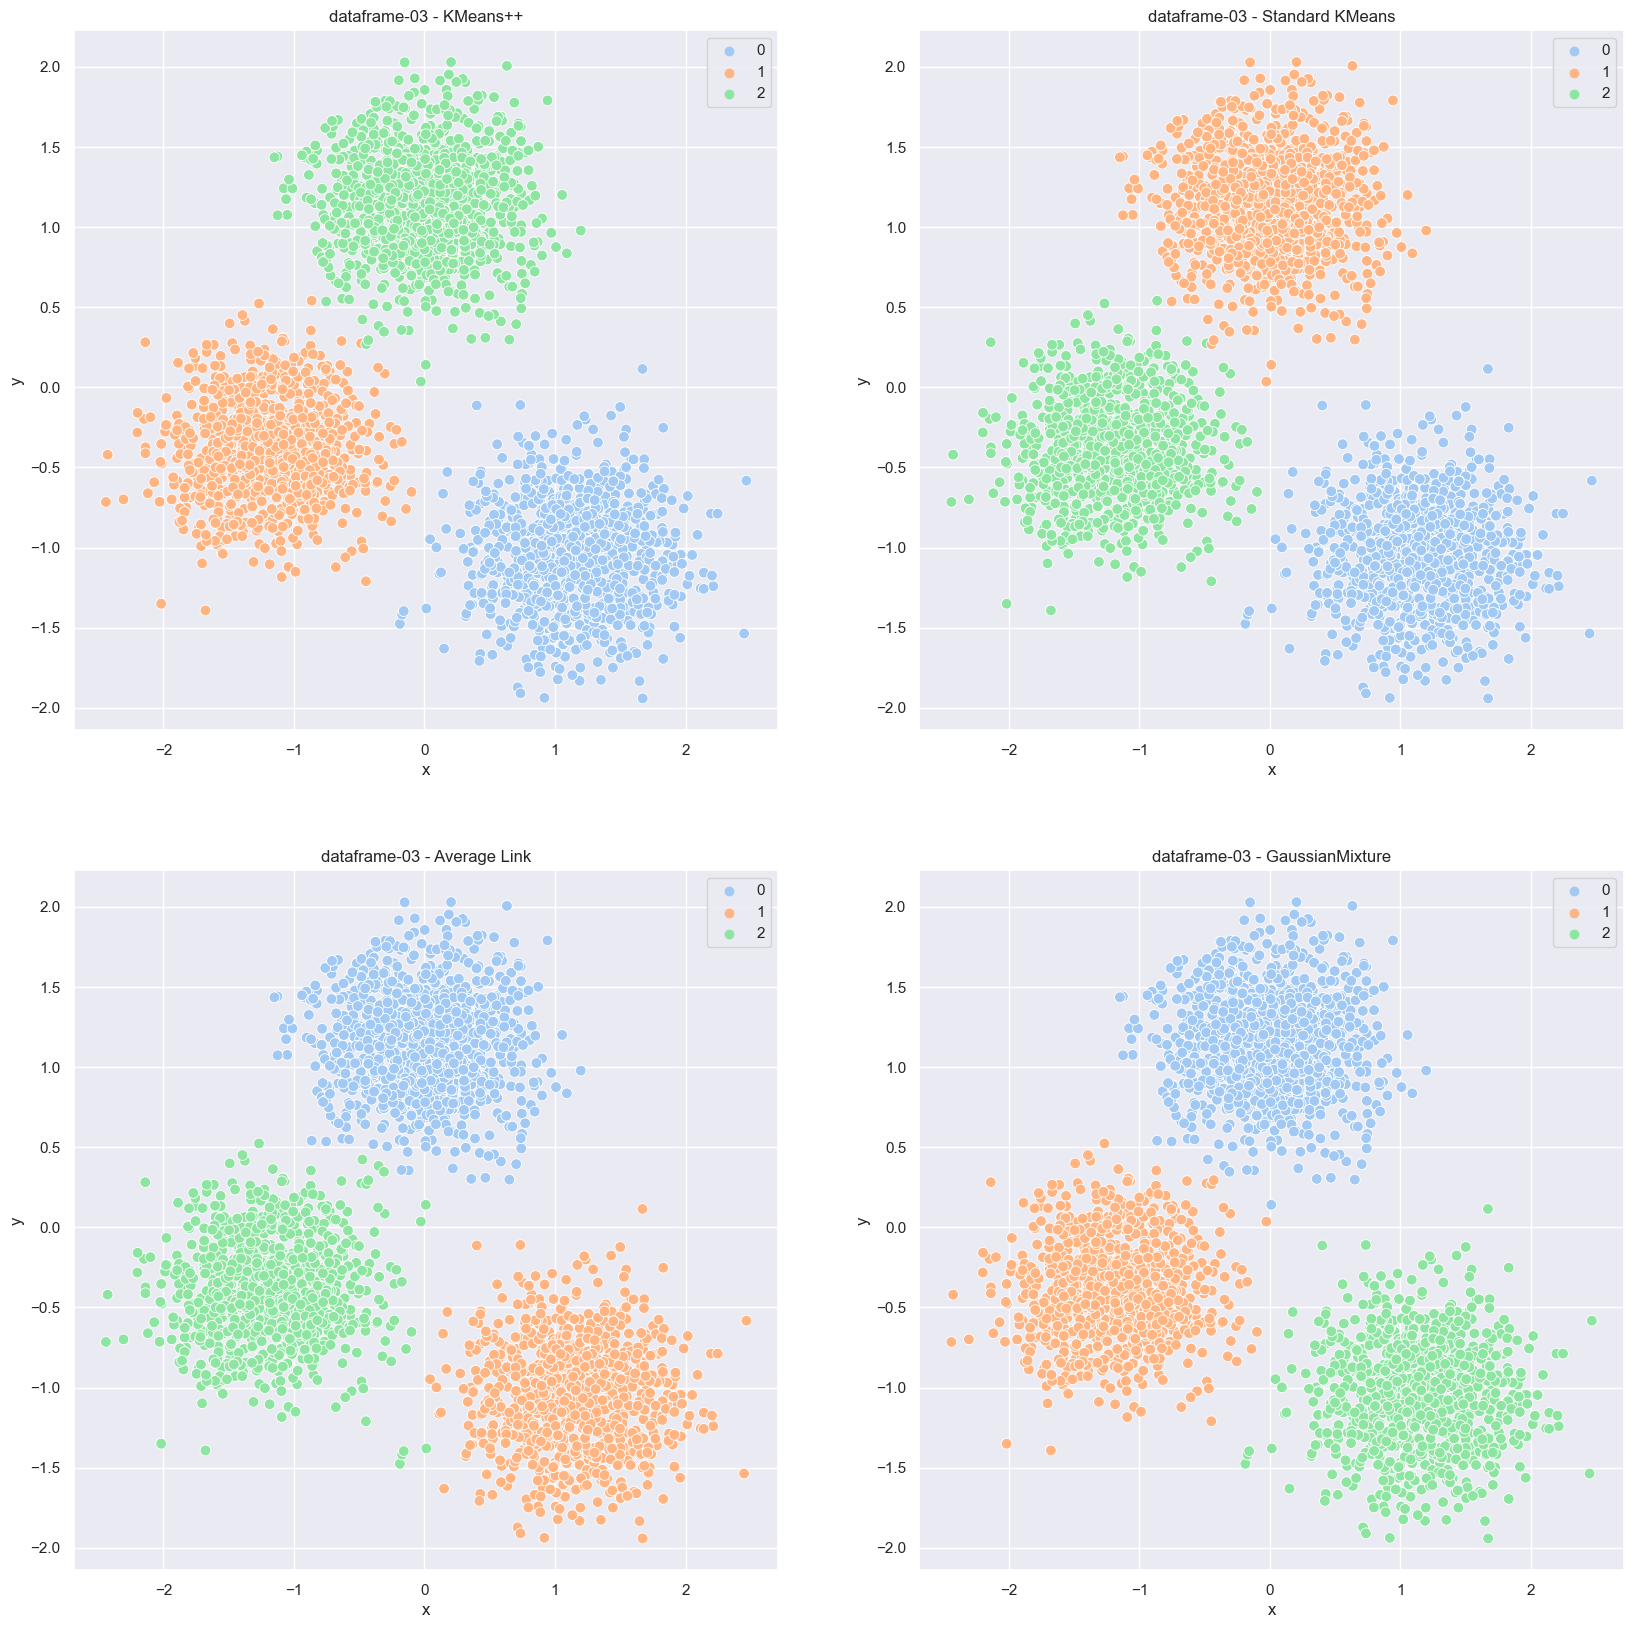

In [30]:
i=2

kmp,km,al,em = quadrupleclustering(X_arr[i],Y_arr[i],i+1,clusters_num[i])

evaldicts[i]['kmp'] = kmp
evaldicts[i]['km'] = km
evaldicts[i]['al'] = al
evaldicts[i]['em'] = em

In [31]:
i=2

printEval(evaldicts[i],i)

			***dataframe-03***

DBSCAN Evaluations: 
	normalized_mutual_info_score ->	 0.9613883397544436
		 adjusted_rand_score ->	 0.9801706790169586


KMeans++ Evaluation:
	normalized_mutual_info_score ->	 0.9903681930499398
		 adjusted_rand_score ->	 0.9949201015264262


Standard KMeans Evaluation:
	normalized_mutual_info_score:	 0.9903681930499401
		 adjusted_rand_score:	 0.9949201015264262


Average Link Evaluation:
	normalized_mutual_info_score:	 0.9735950997333801
		 adjusted_rand_score:	 0.9851710501608529


GaussianMixture Evaluation:
	normalized_mutual_info_score:	 0.9872347608204501
		 adjusted_rand_score:	 0.9928945250461099




> Clusters are spherical  

> The data is noisy.

#### Following blocks of code are the implementations on the fourth DataFrame:

			***dataframe-04***

DBSCAN Evaluations for eps=0.3, min_samples=10: 
	normalized_mutual_info_score ->	 1.0
		 adjusted_rand_score ->	 1.0




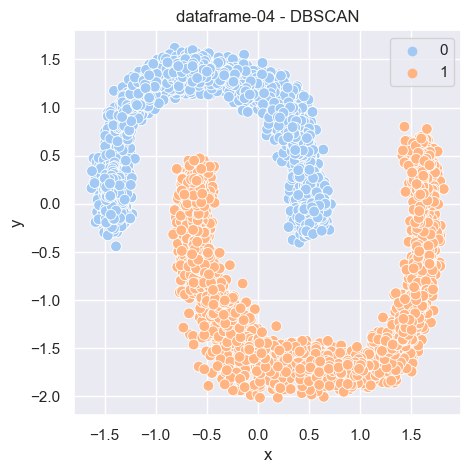

In [32]:
i=3

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.3, min_samples=10, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.3, min_samples=10: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-04***

DBSCAN Evaluations for eps=0.5, min_samples=10: 
	normalized_mutual_info_score ->	 0.0
		 adjusted_rand_score ->	 0.0




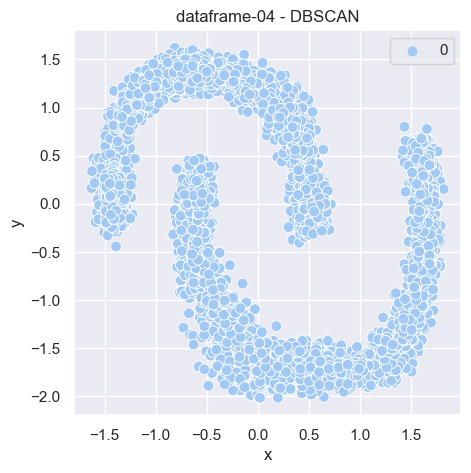

In [33]:
i=3

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.5, min_samples=10, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.5, min_samples=10: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-04***

DBSCAN Evaluations for eps=0.2, min_samples=20: 
	normalized_mutual_info_score ->	 0.9986896445620954
		 adjusted_rand_score ->	 0.999604162872468




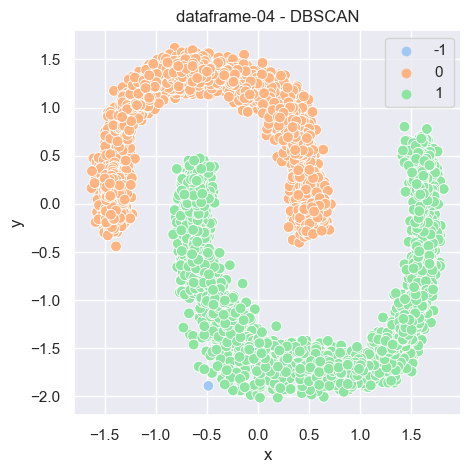

In [34]:
i=3

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.2, min_samples=20, df_num=i+1, clusters_num=clusters_num[i])


evaldicts[i]['dbscan'] = dbscan

print('DBSCAN Evaluations for eps=0.2, min_samples=20: ')
print('\tnormalized_mutual_info_score ->\t', dbscan['nmi'])
print('\t\t adjusted_rand_score ->\t', dbscan['rs'])
print('\n')

			***dataframe-04***



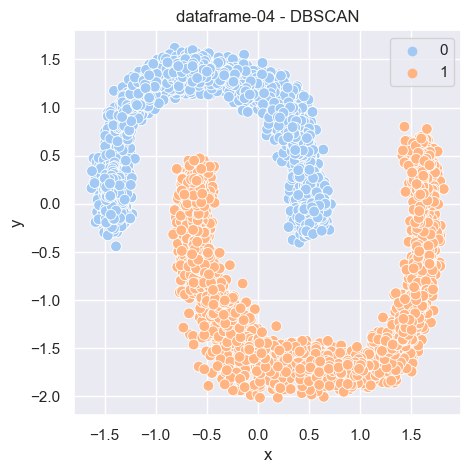

In [35]:
i=3

dbscan = abstract_dbscan(X_arr[i], Y_arr[i], eps=0.2, min_samples=14, df_num=i+1, clusters_num=clusters_num[i])

evaldicts[i]['dbscan'] = dbscan

			***dataframe-04***



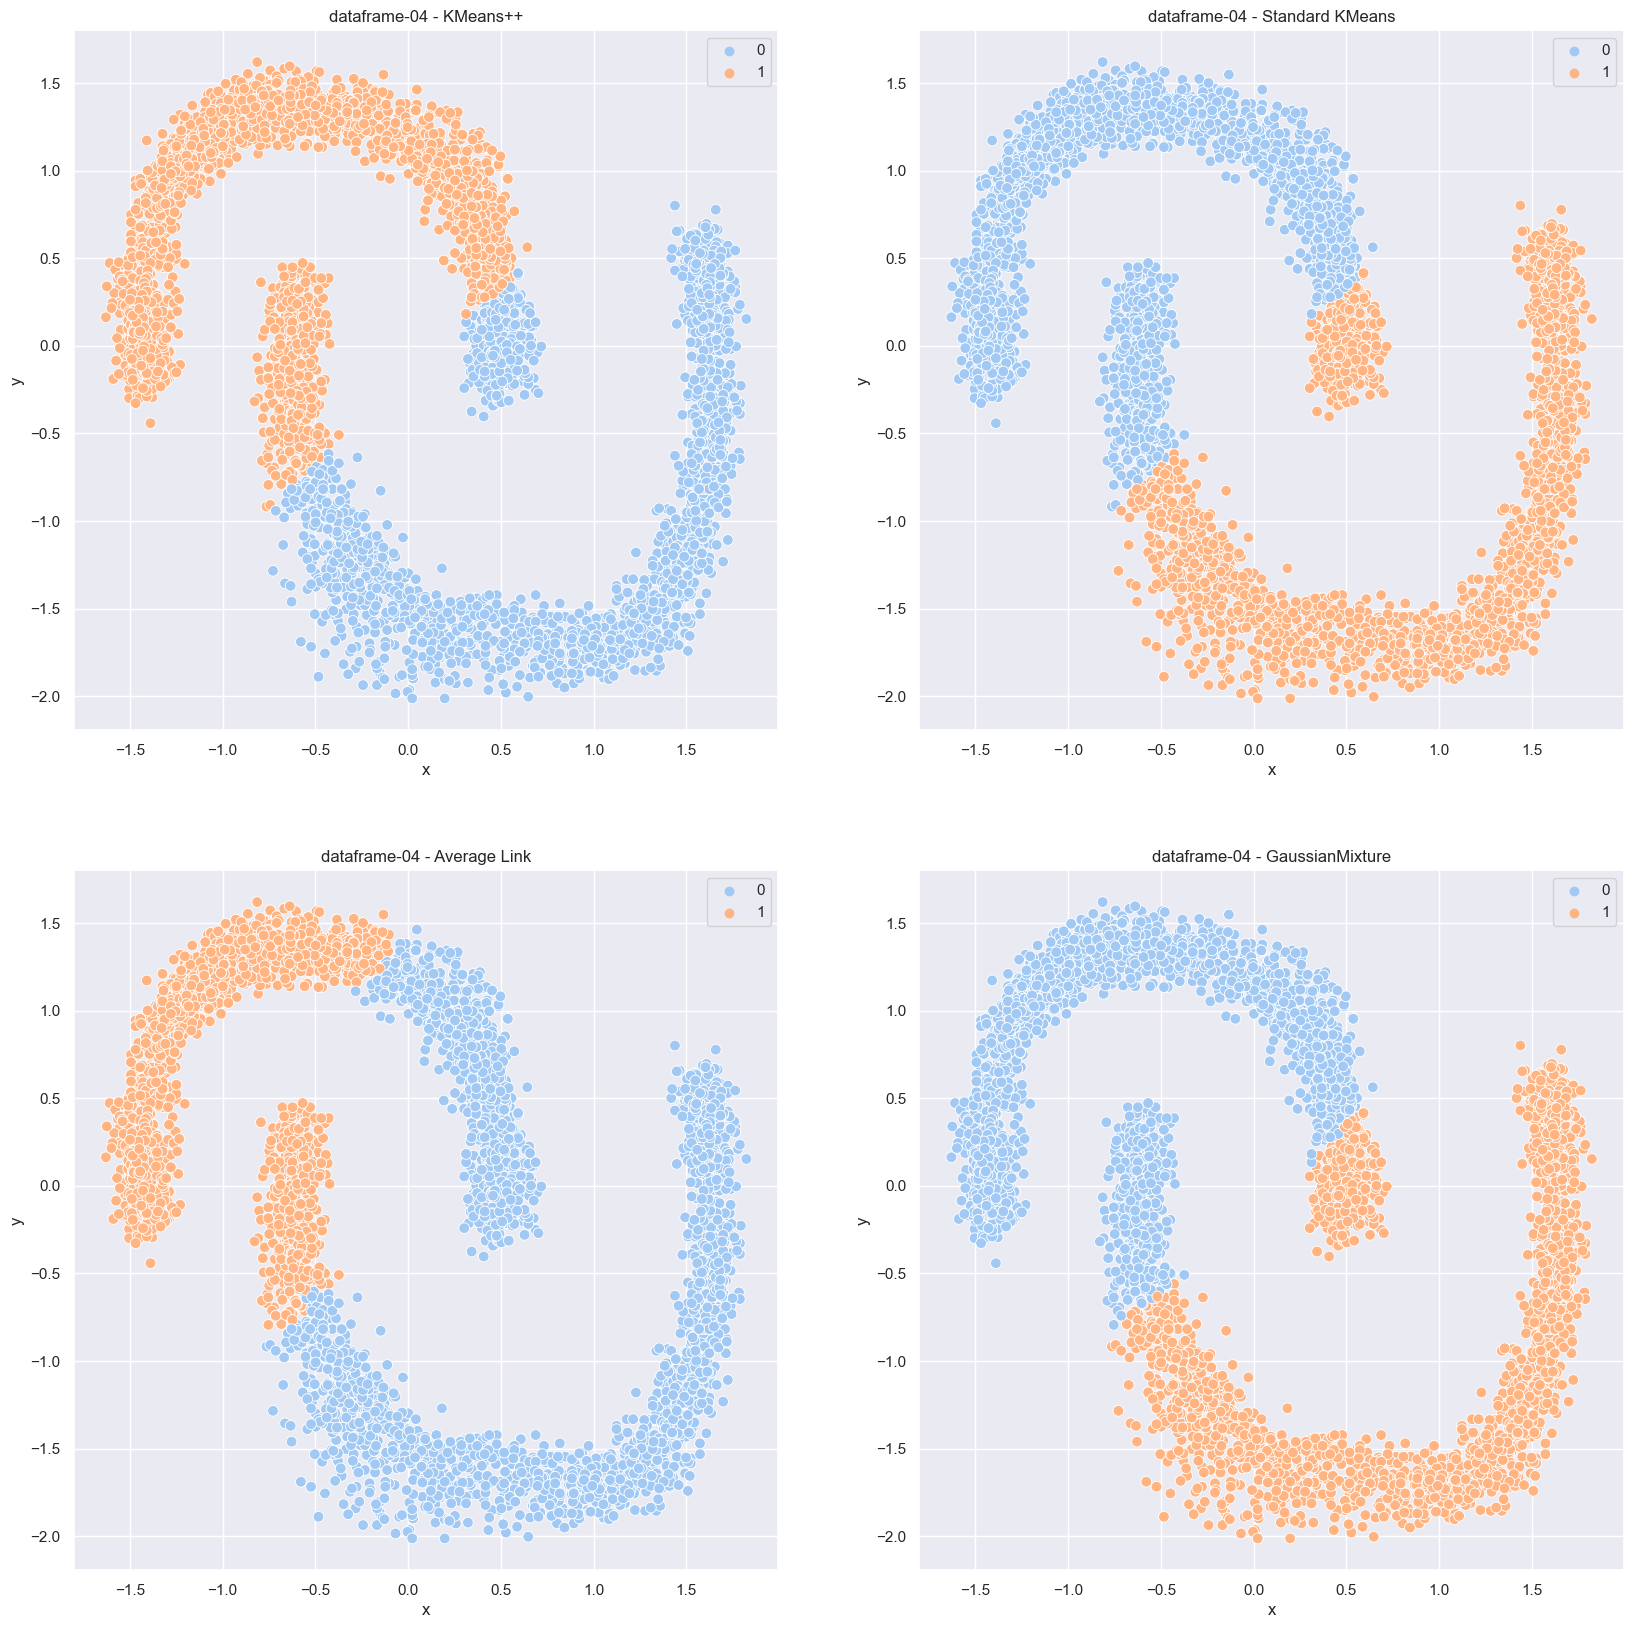

In [36]:
i=3

kmp,km,al,em = quadrupleclustering(X_arr[i],Y_arr[i],i+1,clusters_num[i])

evaldicts[i]['kmp'] = kmp
evaldicts[i]['km'] = km
evaldicts[i]['al'] = al
evaldicts[i]['em'] = em

In [37]:
i=3

printEval(evaldicts[i],i)

			***dataframe-04***

DBSCAN Evaluations: 
	normalized_mutual_info_score ->	 1.0
		 adjusted_rand_score ->	 1.0


KMeans++ Evaluation:
	normalized_mutual_info_score ->	 0.3248266059913712
		 adjusted_rand_score ->	 0.41425590970764076


Standard KMeans Evaluation:
	normalized_mutual_info_score:	 0.3248266059913712
		 adjusted_rand_score:	 0.41425590970764076


Average Link Evaluation:
	normalized_mutual_info_score:	 0.12043713446796991
		 adjusted_rand_score:	 0.14909007847441194


GaussianMixture Evaluation:
	normalized_mutual_info_score:	 0.3303612721625465
		 adjusted_rand_score:	 0.4212467964785012




> Data is not scattered in spherical areas.  

> The boundry between clusters are easily recognizable.

### Final Note:  

> DBSCAN performed fairly on every dataset.  

> KMeans only works well when the boundry between clusters are obvious and the clusters has spherical shape  

> Average Link works best for incoherence clusters.  

> Gaussian Mixture (EM) works well on spherical clusters.

## Source:

https://scikit-learn.org/stable/